## A Classification Problem Statement using Ensemble technique(Random Forest)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\kjk\\Desktop\\AcadGild\\Data Science\\Assignment-4\\Classification'

In [69]:
test=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/test.csv')
train=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/train.csv')
# train=pd.read_csv('train.csv')
# train=pd.read_csv('test.csv')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


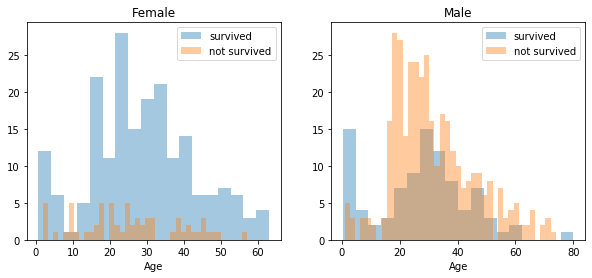

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

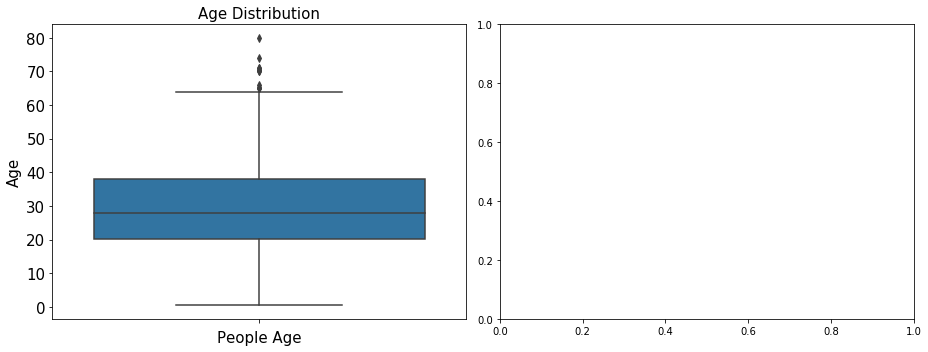

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

# sns.distplot(train['Age'], ax = ax2)
# sns.despine(ax = ax2)
# ax2.set_xlabel('Age', fontsize=15)
# ax2.set_ylabel('Occurence', fontsize=15)
# ax2.set_title('Age x Ocucurence', fontsize=15)
# ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Embarked, Pclass and Sex:

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


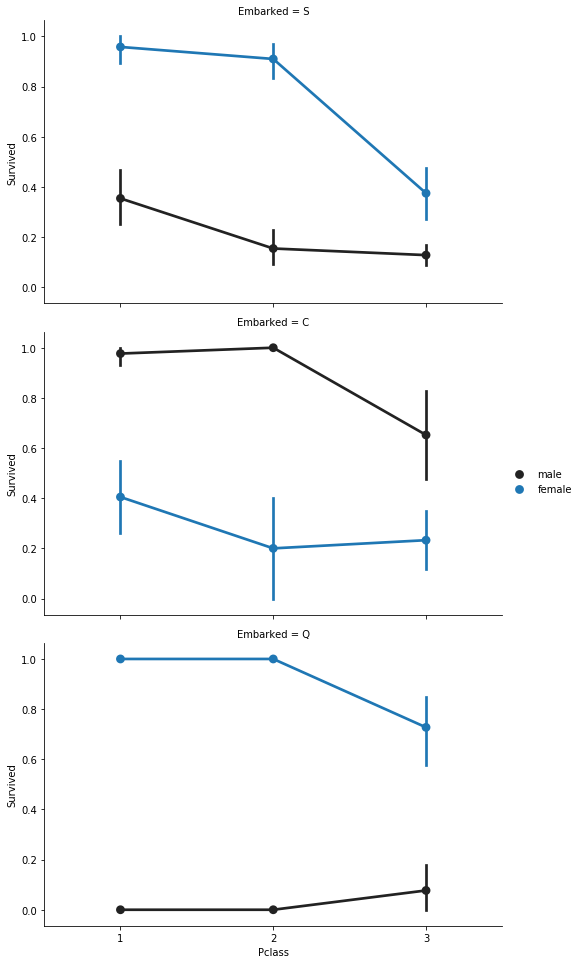

In [9]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

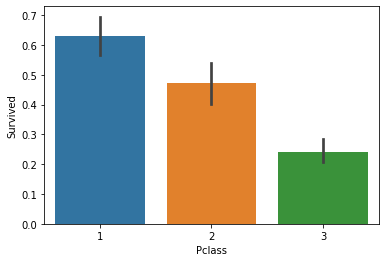

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train)

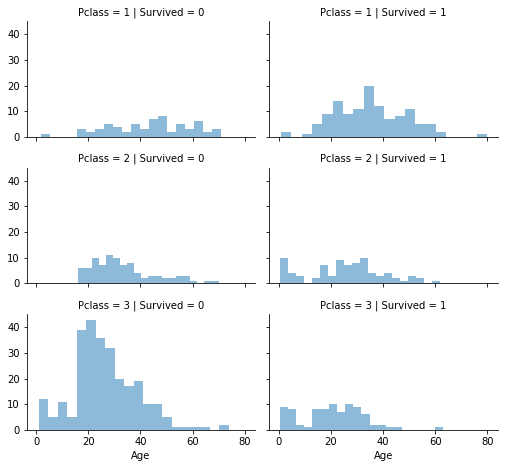

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch:

In [12]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


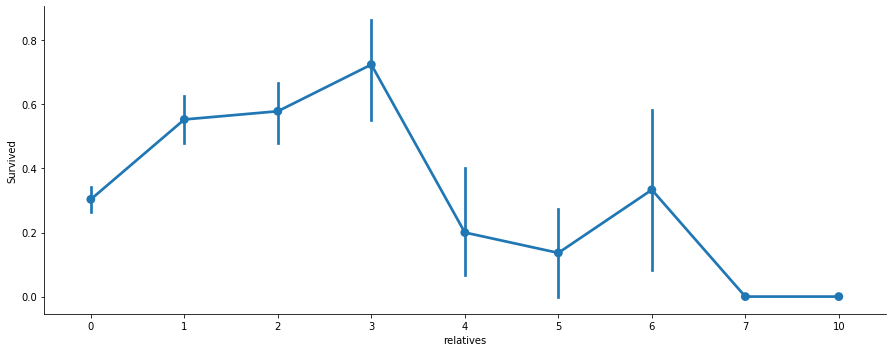

In [13]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )


## Data preprocessing

##### we are droping the Passengerid because its everry are uniuqe.

In [70]:
train=train.drop(['PassengerId'],axis=1)
test=test.drop(['PassengerId'],axis=1)

In [71]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Deal with missing and duplicate values

In [73]:
def Check_duplicate(df):
    duplicate_row=df.duplicated().sum()
    null_values=df.isnull().sum()
    Total_null_values=sum(null_values)
    if(duplicate_row>0):
        print("Please remove duplicates Row=",duplicate_row)
    elif(Total_null_values>0):
            print("Please deal with Missing Values",null_values)
    else:
        print(duplicate_row,"duplicated and null/Missing vlues",Total_null_values," in this dataFrame")

In [74]:
Check_duplicate(train)

Please deal with Missing Values Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [75]:
Check_duplicate(test)

Please deal with Missing Values Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [76]:
# Quartiles
def deal_with_outlier(column,df_name,col_name):
    Q1=column.quantile(q = 0.25)
    Q2=column.quantile(q = 0.50)
    Q3=column.quantile(q = 0.75)
    Q4=column.quantile(q = 1.00)
    print('1º Quartile: ', Q1)
    print('2º Quartile: ', Q2)
    print('3º Quartile: ', Q3)
    print('4º Quartile: ', Q4)
    #Calculate the outliers:
    IQR = Q3 - Q1  # Interquartile range, 
    Lower=Q1 - 1.5 * IQR
    Upper=Q3 + 1.5 * IQR
    print("Lower bound",Lower)
    print("Upper bound",Upper)  
    out=column.quantile(q = 0.75) + 1.5*(column.quantile(q = 0.75) - column.quantile(q = 0.25))
    print(' above: ',out , 'are outliers')
   
    
#      show the percentage of outlier for upper
    print('Number of outliers in upper: ', df_name[column > Upper][col_name].count())
    print('Number of clients: ', len(df_name))
#Outliers in %
    print('Outliers are:', round(df_name[column > Upper][col_name].count()*100/len(df_name),2), '%')
    
    #     show the percentage of outlier for lower
    print('Number of outliers in Lower: ', df_name[column > Lower][col_name].count())
    print('Number of clients: ', len(df_name))
#Outliers in %
    print('Outliers are:', round(df_name[column > Lower][col_name].count()*100/len(df_name),2), '%')
    
#     Deal with outlier

    ## Flooring
    df_name.loc[column < (Q1 - 1.5 * IQR),col_name] = column.quantile(0.05)
    ## Capping 
    df_name.loc[column > (Q3 + 1.5 * IQR),col_name] = column.quantile(0.95)
    
    Boxplot=df_name.boxplot(column=[col_name])
    
#     After deal with outlier
    
#     show the percentage of outlier for upper 
    print('Number of outliers in upper Afer deal: ', df_name[column > Upper][col_name].count())
    print('Number of clients: ', len(df_name))
#Outliers in %
    print('Outliers are Afer deal:', round(df_name[column > Upper][col_name].count()*100/len(df_name),2), '%')
    
    #     show the percentage of outlier for lower
    print('Number of outliers in Lower Afer deal: ', df_name[column > Lower][col_name].count())
    print('Number of clients: ', len(df_name))
#Outliers in %
    print('Outliers are Afer deal:', round(df_name[column > Lower][col_name].count()*100/len(df_name),2), '%')
    return Boxplot

### AGE variable

Text(0.5, 1.0, 'we have see outlier in AGE Variable')

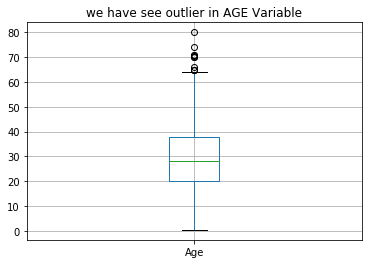

In [77]:
train.boxplot(column=['Age'])
plt.title('we have see outlier in AGE Variable')

1º Quartile:  20.125
2º Quartile:  28.0
3º Quartile:  38.0
4º Quartile:  80.0
Lower bound -6.6875
Upper bound 64.8125
 above:  64.8125 are outliers
Number of outliers in upper:  11
Number of clients:  891
Outliers are: 1.23 %
Number of outliers in Lower:  714
Number of clients:  891
Outliers are: 80.13 %
Number of outliers in upper Afer deal:  0
Number of clients:  891
Outliers are Afer deal: 0.0 %
Number of outliers in Lower Afer deal:  714
Number of clients:  891
Outliers are Afer deal: 80.13 %


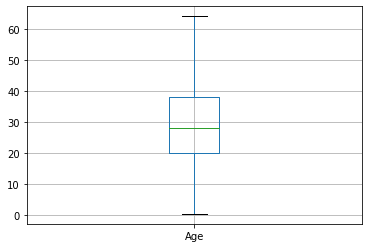

In [78]:
deal_with_outlier(train['Age'],train,'Age')

# train.boxplot(column=['Age'])
# plt.title('we have see outlier in AGE Variable')

In [79]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(train['Age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(train['Age'].std(), 1))

print('Median',round(train['Age'].median(),1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(train['Age'].std()*100/train['Age'].mean(), 1), ', High middle dispersion')

MEAN: 29.5
STD : 14.0
Median 28.0
CV  : 47.5 , High middle dispersion


Text(0.5, 1.0, 'We have see outlier in AGE Variable(test dataset)')

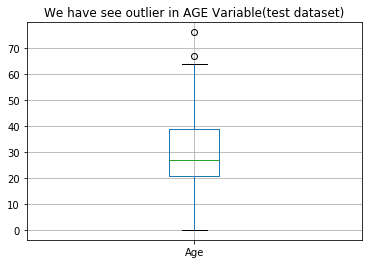

In [80]:
test.boxplot(column=['Age'])
plt.title('We have see outlier in AGE Variable(test dataset)')

1º Quartile:  21.0
2º Quartile:  27.0
3º Quartile:  39.0
4º Quartile:  76.0
Lower bound -6.0
Upper bound 66.0
 above:  66.0 are outliers
Number of outliers in upper:  2
Number of clients:  418
Outliers are: 0.48 %
Number of outliers in Lower:  332
Number of clients:  418
Outliers are: 79.43 %
Number of outliers in upper Afer deal:  0
Number of clients:  418
Outliers are Afer deal: 0.0 %
Number of outliers in Lower Afer deal:  332
Number of clients:  418
Outliers are Afer deal: 79.43 %


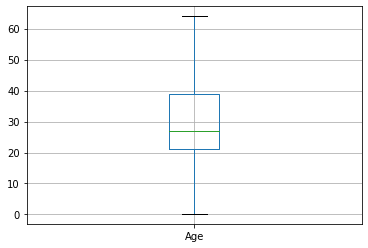

In [81]:
deal_with_outlier(test['Age'],test,'Age')

# train.boxplot(column=['Age'])
# plt.title('we have see outlier in AGE Variable')

In [82]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

In [83]:
Check_duplicate(train)

Please deal with Missing Values Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [84]:
Check_duplicate(test)

Please deal with Missing Values Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


### Cabin

In [85]:
train['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [86]:
# import re
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
# data = [train, test]

# for dataset in data:
#     dataset['Cabin'] = train['Cabin'].fillna("U0")
#     dataset['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#     dataset['Deck'] = train['Deck'].map(deck)
#     dataset['Deck'] = train['Deck'].fillna(0)
#     dataset['Deck'] = train['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test= test.drop(['Cabin'], axis=1)

In [87]:
Check_duplicate(train)

Please deal with Missing Values Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64


In [90]:
train = train.dropna()

In [91]:
train=train.reset_index(drop=True)

In [92]:
Check_duplicate(train)

0 duplicated and null/Missing vlues 0  in this dataFrame


In [93]:
Check_duplicate(test)

Please deal with Missing Values Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64


### Fare
first deal with outlier & missing then Converting “Fare” from float to int64, using the “astype()” function pandas provides:


Text(0.5, 1.0, 'we have see outlier in Fare Variable')

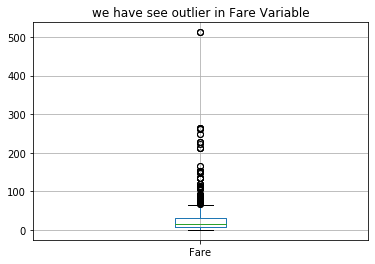

In [94]:
train.boxplot(column=['Fare'])
plt.title('we have see outlier in Fare Variable')

1º Quartile:  7.8958
2º Quartile:  14.4542
3º Quartile:  31.0
4º Quartile:  512.3292
Lower bound -26.7605
Upper bound 65.6563
 above:  65.6563 are outliers
Number of outliers in upper:  114
Number of clients:  889
Outliers are: 12.82 %
Number of outliers in Lower:  889
Number of clients:  889
Outliers are: 100.0 %
Number of outliers in upper Afer deal:  114
Number of clients:  889
Outliers are Afer deal: 12.82 %
Number of outliers in Lower Afer deal:  889
Number of clients:  889
Outliers are Afer deal: 100.0 %


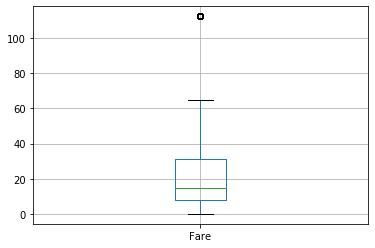

In [97]:
deal_with_outlier(train['Fare'],train,'Fare')

# train.boxplot(column=['Fare'])
# plt.title('we have see outlier in Fare Variable')

Text(0.5, 1.0, 'we have see outlier in Fare Variable(test dataset)')

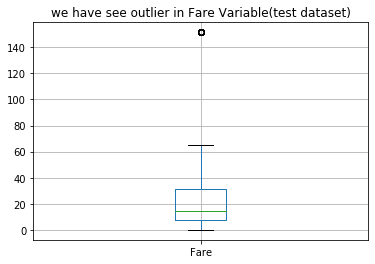

In [96]:
test.boxplot(column=['Fare'])
plt.title('we have see outlier in Fare Variable(test dataset)')

1º Quartile:  7.8958
2º Quartile:  14.4542
3º Quartile:  31.5
4º Quartile:  512.3292
Lower bound -27.5105
Upper bound 66.9063
 above:  66.9063 are outliers
Number of outliers in upper:  55
Number of clients:  418
Outliers are: 13.16 %
Number of outliers in Lower:  417
Number of clients:  418
Outliers are: 99.76 %
Number of outliers in upper Afer deal:  55
Number of clients:  418
Outliers are Afer deal: 13.16 %
Number of outliers in Lower Afer deal:  417
Number of clients:  418
Outliers are Afer deal: 99.76 %


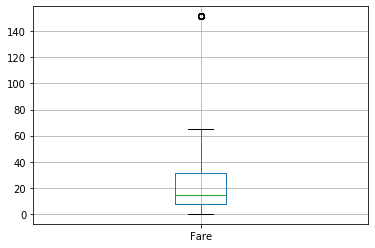

In [95]:
deal_with_outlier(test['Fare'],test,'Fare')

# train.boxplot(column=['Fare'])
# plt.title('we have see outlier in Fare Variable')

In [98]:
train['Fare']=train['Fare'].fillna(train['Fare'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [99]:
Check_duplicate(train)

0 duplicated and null/Missing vlues 0  in this dataFrame


In [100]:
Check_duplicate(test)

0 duplicated and null/Missing vlues 0  in this dataFrame


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.5+ KB


In [102]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,112.31832,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92500,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,S


In [103]:
Check_duplicate(test)  # now age have no duplicte and no outlier

0 duplicated and null/Missing vlues 0  in this dataFrame


In [104]:
data = [train, test]

for dataset in data:
#     dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null int32
Embarked    889 non-null object
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.1+ KB


In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null int32
Embarked    418 non-null object
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 27.8+ KB


### Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [107]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train= train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

### Sex:
Convert ‘Sex’ feature into numeric.


In [108]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


### Ticket:

In [109]:
train['Ticket'].describe()

count      889
unique     680
top       1601
freq         7
Name: Ticket, dtype: object

##### Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.


In [110]:
train= train.drop(['Ticket'], axis=1)
test= test.drop(['Ticket'], axis=1)

### Embarked:
Convert ‘Embarked’ feature into numeric.


In [111]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories:
We will now create categories within the following features:

In [112]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [113]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7,0,1
1,1,1,1,5,1,0,112,1,3
2,1,3,1,3,0,0,7,0,2
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,1


In [114]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,5,0,0,7,2,1
1,3,1,6,1,0,7,0,3
2,2,0,6,0,0,9,2,1
3,3,0,3,0,0,8,0,1
4,3,1,2,1,1,12,0,3


### Now we are select the feature

In [115]:
y=train.Survived

In [116]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [117]:
X=train.drop(['Survived'], axis=1)

In [118]:
X_train = train.drop(['Survived'], axis=1)

In [119]:
y_train=train.Survived

In [120]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2,1,0,7,0,1
1,1,1,5,1,0,112,1,3
2,3,1,3,0,0,7,0,2
3,1,1,5,1,0,53,0,3
4,3,0,5,0,0,8,0,1


In [121]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import KFold


### Standarized Our variable

In [123]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(test)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### LOGISTIC REGRESSION

In [124]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_train)

# predict our train dataset

cnf_matrix=confusion_matrix(y_train, logpred)
print("Confusion Matrix on Train Dataset:")
print(confusion_matrix(y_train, logpred))
print(round(accuracy_score(y_train, logpred),2)*100)



C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix on Train Dataset:
[[474  75]
 [ 94 246]]
81.0


### Stratified cross-validation
Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class

In [125]:
# Stratified cross validation
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('strtified cross validation accuracy',LOGCV)

strtified cross validation accuracy 0.8021195097037793


C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train, logpred))
print(round(accuracy_score(y_train, logpred),2)*100)

[[474  75]
 [ 94 246]]
81.0


Confusion matrix, without normalization
[[474  75]
 [ 94 246]]


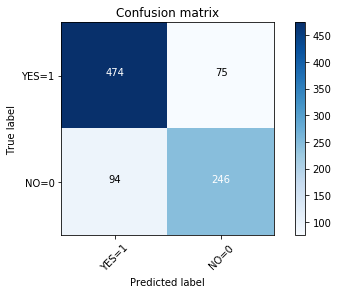

In [127]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['YES=1','NO=0'],normalize= False,  title='Confusion matrix')

### Model applying on Test dataset

In [128]:
logpred = logmodel.predict(X_test)

# confusion matrix
# cnf_matrix=confusion_matrix(y_train, logpred)
# print(confusion_matrix(y_train, logpred))
# print(round(accuracy_score(y_train, logpred),2)*100)


### DECESION TREE

In [129]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.tree import export_graphviz

In [130]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [132]:
# use the model to make predictions with the test data
y_pred_train = dtree.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

### Evaluate the model's performance on Train Datasets

Including the tree's axis-parallel decision boundaries and how the tree splits

In [133]:
# how did our model perform?
# count_misclassified =(y_test!= y_pred).sum()
# print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83


In [134]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Cross Validation

Cross Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.

In [146]:
# from sklearn.cross_validation import KFold

# cv = KFold(n=len(bank_final),  # Number of elements
#            n_folds=10,            # Desired number of cv folds
#            random_state=12) 
cv = KFold(n_splits=12, shuffle=True, random_state=0)

In [147]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.7466666666666667, 0.7432432432432432, 0.8783783783783784, 0.7972972972972973, 0.8378378378378378, 0.8648648648648649, 0.8108108108108109, 0.8783783783783784, 0.8513513513513513, 0.7837837837837838, 0.8108108108108109, 0.8918918918918919] 

Average accuracy:  0.8246096096096096


# Intro to ensemble methods

**Ensemble methods** are supervized learning models which combine the predictions of multiple smaller models to improve predictive power and generalization.

The smaller models that combine to make the ensemble model are referred to as **base models**. Ensemble methods often result in considerably higher performance than any of the individual base models could achieve.

<img src='https://bradzzz.gitbooks.io/ga-seattle-dsi/dsi/dsi_06_trees_methods/2.3-lesson/assets/images/Ensemble.png'>/

## Bagging

The ensemble method we will be using today is called **bagging**, which is short for **bootstrap aggregating**.

Bagging builds multiple base models with **resampled training data with replacement.** We train $k$ base classifiers on $k$ different samples of training data. Using random subsets of the data to train base models promotes more differences between the base models.

Random Forests, which "bag" Multiple decision trees, can achieve very high classification accuracy.

In [148]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
# from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

In [151]:
# MANUAL PROCESS

clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
clf.fit(X_train, y_train)

clf2 = DecisionTreeClassifier(random_state=1, max_depth=5)
clf2.fit(X_train, y_train)

predictions_1 = clf.predict(X_train) # we have ony X_test data we don't have y_test data so we apply on train data check roc_auc_score
print(roc_auc_score(y_train, predictions_1))

predictions_2 = clf2.predict(X_train)
print(roc_auc_score(y_train, predictions_2))

# applying on Test data set

# predictions_1 = clf.predict(test) # we have ony X_test data we don't have y_test data so we apply on train data check roc_auc_score
# print(roc_auc_score(y_train, predictions_1))

# predictions_2 = clf2.predict(test)
# print(roc_auc_score(y_train, predictions_2))

0.8681988642451516
0.8338074574091933


## Combining Our Predictions
When we have multiple classifiers making predictions, we can treat each set of predictions as a column in a matrix. 

settings|test AUC
--- | --- 
min_samples_leaf: 2|0.868
max_depth: 5|0.833
combined predictions|0.851

## Selecting Random Features
With the bagging example, we gained some accuracy over a single decision tree. We achieved an AUC score of around 0.851 with bagging.
`

In [160]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestClassifier(max_features=8, random_state=1)
rfc1.fit(X_train, y_train)
pred1 = rfc1.predict(X_train)
print(roc_auc_score(y_train, pred1))

# play around with the setting for max_features
rfc2 = RandomForestClassifier(max_features=6, random_state=1)
rfc2.fit(X_train, y_train)
pred2 = rfc2.predict(X_train)
print(roc_auc_score(y_train, pred2))




# applyin on test dataset------------------------------------------

# we can achieve the above two tasks using the following codes
# Bagging: using all features



# rfc1 = RandomForestClassifier(max_features=8, random_state=1)
# rfc1.fit(X_train, y_train)
# pred1 = rfc1.predict(X_train)
# print(roc_auc_score(y_train, pred1))

# # play around with the setting for max_features
# rfc2 = RandomForestClassifier(max_features=6, random_state=1)
# rfc2.fit(X_train, y_train)
# pred2 = rfc2.predict(X_train)
# print(roc_auc_score(y_train, pred2))


0.9132272581163612
0.9102860816457731


C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
